## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [3]:
# Combine the data into a single dataset


In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset
mouse_study_results = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
mouse_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
mouse_total = mouse_study_results['Mouse ID'].nunique()
print(f"the total number of mouse is {mouse_total}")

the total number of mouse is 249


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mouse = mouse_study_results.loc[mouse_study_results.duplicated(subset = 
                        ["Mouse ID", "Timepoint"], keep = False), : ]

duplicated_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 



In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_results.drop_duplicates(subset =["Mouse ID", "Timepoint"], 
                                                     ignore_index =True)

In [11]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df.count()


Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [12]:
clean_mouse_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#mean
tumor_mean = clean_mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

#median
tumor_median= clean_mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

#variance
tumor_variance = clean_mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

#standard deviation
tumor_sdev = clean_mouse_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

#SEM
tumor_sem = clean_mouse_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


#create a dictionary
tumor_dictionary = {"mean": tumor_mean,
                    "median": tumor_median,
                    "variance": tumor_variance,
                    "SDEV":tumor_sdev,
                    "SEM":tumor_sem}
#create dataframe
tumor_summary_stats = pd.DataFrame(tumor_dictionary)
 
#print
tumor_summary_stats

,mean,median,variance,SDEV,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_mean = clean_mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median= clean_mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_variance = clean_mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_sdev = clean_mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_aggregation_method =clean_mouse_df.groupby("Drug Regimen").agg(
                            mean = ('Tumor Volume (mm3)', 'mean'), 
                            median = ('Tumor Volume (mm3)', 'median'),
                            var = ('Tumor Volume (mm3)', 'var'),
                            std = ('Tumor Volume (mm3)', 'std'),
                            sem = ('Tumor Volume (mm3)', 'sem')
                                                    )

summary_aggregation_method


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

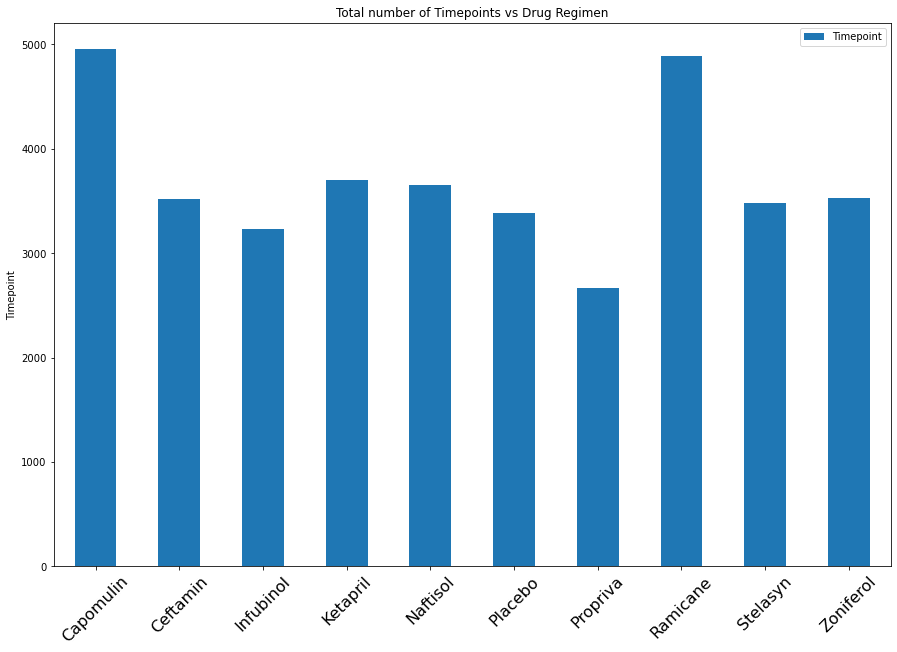

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#create a regimen dataframe
regimen_testing_time = pd.DataFrame(
                    clean_mouse_df.groupby(["Drug Regimen"]).sum()["Timepoint"])

#reset index of the regimen_testing_time dataframe
regimen_testing = regimen_testing_time.reset_index()


#barplot
regimen_testing.plot(kind = "bar", 
                          ylabel = "Timepoint",
                          figsize=(15,10),
                          title = "Total number of Timepoints vs Drug Regimen"
                         )

ypos =np.arange(len(regimen_testing["Drug Regimen"]))
plt.xticks(ypos, regimen_testing["Drug Regimen"], rotation = 45, fontsize=16)

#show the barplot
plt.show()





In [16]:
regimen_testing.head()


,Drug Regimen,Timepoint
0,Capomulin,4960
1,Ceftamin,3515
2,Infubinol,3235
3,Ketapril,3705
4,Naftisol,3650


In [17]:
Drug_regimen = regimen_testing["Drug Regimen"]
Timepoint = regimen_testing["Timepoint"]

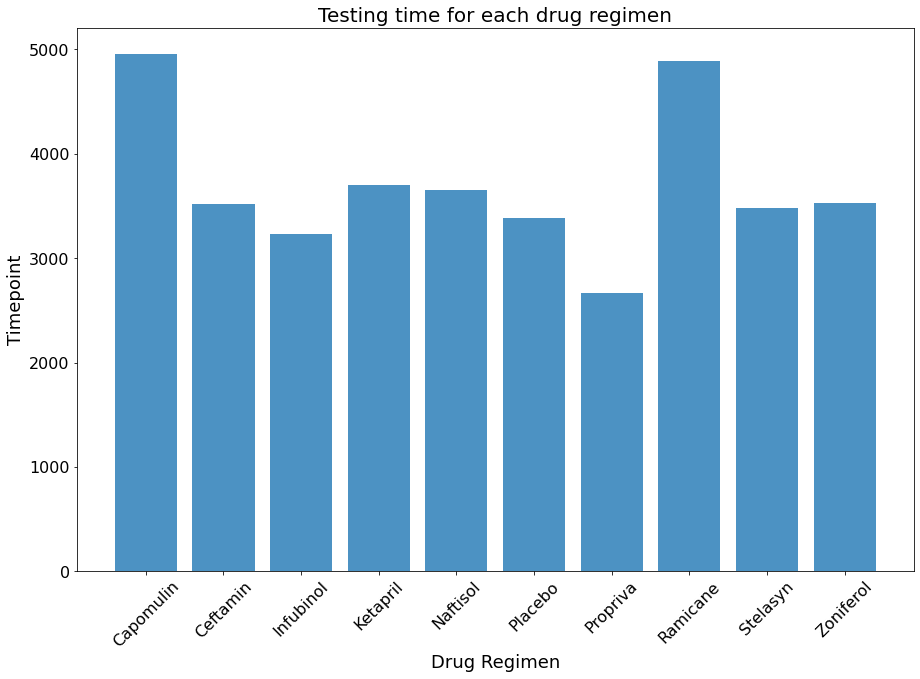

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#fig size
plt.figure(figsize=(15,10))

#Plot
ypos = np.arange(0, len(Drug_regimen))
ax = plt.bar(ypos, Timepoint, alpha = 0.8, align = 'center', )
ax = plt.xticks(ypos,Drug_regimen, rotation = 45, fontsize=16)
ax = plt.yticks(fontsize=16)

#Chart labels
plt.xlabel("Drug Regimen", fontsize=18 )
plt.ylabel('Timepoint', fontsize=18)
plt.title('Testing time for each drug regimen', fontsize=20)



#show the chart
plt.show()

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#creating a dataframe with male and female data
male_and_female= pd.DataFrame({"sex": ["male", "female"], 
                               "Total":[len(clean_mouse_df.query('Sex == "Male"')),
                                       len(clean_mouse_df.query('Sex == "Female"'))]})
                               
                               #male":len(clean_mouse_df.query('Sex == "Male"')),
                            #"female":len(clean_mouse_df.query('Sex == "Female"'))},
                             #index=[0] )
male_and_female

,sex,Total
0,male,958
1,female,930


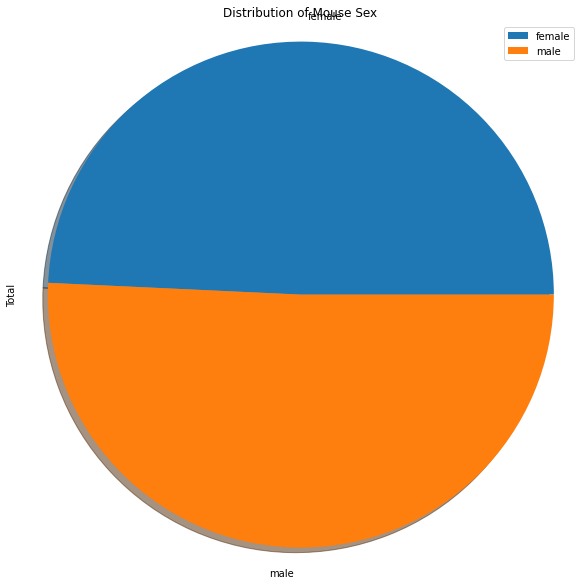

In [20]:
#plot showing the distribution of female versus male mice using Pandas
pie_chart= male_and_female.groupby(['sex']).sum().plot(
                                kind="pie",
                                y='Total', 
                                title=("Distribution of Mouse Sex"), 
                                figsize=(10, 10),
                                shadow=True, )


#pie_chart = ylabel("Sex")

plt.axis("equal")
plt.show()

total number of females tested is 930
total number of males tested is 958


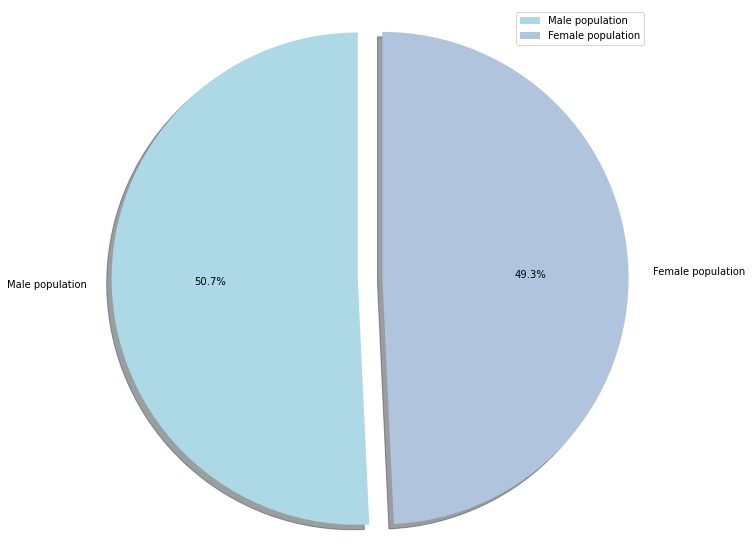

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

total_males_tested = len(clean_mouse_df.query('Sex == "Male"'))
total_females_tested= len(clean_mouse_df.query('Sex == "Female"'))

print(f"total number of females tested is {total_females_tested}")
print(f"total number of males tested is {total_males_tested}")

plt.figure(figsize=(10,10))
Tasks = [total_males_tested,total_females_tested]

my_labels = 'Male population','Female population'
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1)
plt.pie(Tasks, labels= my_labels, 
        autopct='%1.1f%%', 
        shadow = True,
        colors=my_colors,
        explode=my_explode,
       startangle=90)

#plt.title('Comparison of male and female population that was tested')
plt.axis('equal')
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#creating a dataframe where the regimens where Capomulin, Ramicane, Infubinol, and Ceftamin
four_drug_regimens= clean_mouse_df.loc[ clean_mouse_df["Drug Regimen"].isin(["Capomulin", 
                                                             "Ramicane", 
                                                             "Infubinol",
                                                             "Ceftamin"])]






# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [23]:
# Start by getting the last (greatest) timepoint for each mouse
#grouping data by mouse ID from the four_drug_regimens dataframe
grouped_bymouse_ID = four_drug_regimens.groupby(['Drug Regimen','Mouse ID']).max(
                                                                                 "Tumor Volume (mm3)")
grouped_bymouse_ID


Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Drug Regimen Mouse ID                                                          
Capomulin    b128               9          22         45           45.651331   
             b742               7          21         45           45.000000   
             f966              16          17         20           45.000000   
             g288               3          19         45           46.304003   
             g316              22          22         45           46.809225   
...                           ...         ...        ...                 ...   
Ramicane     s508               1          17         45           45.000000   
             u196              18          25         45           47.622816   
             w678               5          24          5           45.000000   
             y449              19          24         15           46.378092   
             z578              11          16         45           45.000000   

                       Metastatic Sites  
Drug Regimen Mouse ID                    
Capomulin    b128                     2  
             b742                     0  
             f966                     0  
             g288                     1  
             g316                     2  
...                                 ...  
Ramicane     s508                     0  
             u196                     3  
             w678                     0  
             y449                     0  
             z578                     0  

[100 rows x 5 columns]

In [24]:
grouped_bymouse_ID.reset_index(inplace=True)


In [38]:
grouped_bymouse_ID

,Drug Regimen,Mouse ID,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,9,22,45,45.651331,2
1,Capomulin,b742,7,21,45,45.000000,0
2,Capomulin,f966,16,17,20,45.000000,0
3,Capomulin,g288,3,19,45,46.304003,1
4,Capomulin,g316,22,22,45,46.809225,2
...,...,...,...,...,...,...,...
95,Ramicane,s508,1,17,45,45.000000,0
96,Ramicane,u196,18,25,45,47.622816,3
97,Ramicane,w678,5,24,5,45.000000,0
98,Ramicane,y449,19,24,15,46.378092,0


In [28]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [43]:
lq = four_drug_regimens.groupby('Drug Regimen',  as_index=False)['Tumor Volume (mm3)'].quantile(.25)
uq = four_drug_regimens.groupby('Drug Regimen',  as_index=False)['Tumor Volume (mm3)'].quantile(.75)
median = four_drug_regimens.groupby('Drug Regimen',  as_index=False)['Tumor Volume (mm3)'].quantile(.5)
#lower_quartile = quartiles[0.25]
#lowerq = quartiles[0.25]
#upper_quartile = quartiles[0.75]
#quartile_range = upper_quaritle-lower_quartile

In [44]:
#lower quartiles
lq

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,37.685933
1,Ceftamin,47.208427
2,Infubinol,47.312353
3,Ramicane,36.674635


In [45]:
#upper quartiles
uq

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,45.000000
1,Ceftamin,56.801438
2,Infubinol,57.314444
3,Ramicane,45.000000


In [46]:
#median
median

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ramicane,40.673236


In [49]:
merged_df = pd.merge(lq, median, on="Drug Regimen")
merged_quartiles_df = pd.merge(merged_df, uq, on="Drug Regimen")
print(merged_quartiles_df)

  Drug Regimen  Tumor Volume (mm3)_x  Tumor Volume (mm3)_y  Tumor Volume (mm3)
0    Capomulin             37.685933             41.557809           45.000000
1     Ceftamin             47.208427             51.776157           56.801438
2    Infubinol             47.312353             51.820584           57.314444
3     Ramicane             36.674635             40.673236           45.000000


In [51]:
quartiles_df = pd.DataFrame(merged_quartiles_df)
quartiles_df.head() 


,Drug Regimen,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)
0,Capomulin,37.685933,41.557809,45.000000
1,Ceftamin,47.208427,51.776157,56.801438
2,Infubinol,47.312353,51.820584,57.314444
3,Ramicane,36.674635,40.673236,45.000000


In [59]:
quartiles_df.rename(columns={"Tumor Volume (mm3)_x": "lower_quartile", 
                             "Tumor Volume (mm3)_y": "median",
                            "Tumor Volume (mm3)":"upper_quartile"},  inplace=True)

In [60]:
quartiles_df

,Drug Regimen,lower_quartile,median,upper_quartile
0,Capomulin,37.685933,41.557809,45.000000
1,Ceftamin,47.208427,51.776157,56.801438
2,Infubinol,47.312353,51.820584,57.314444
3,Ramicane,36.674635,40.673236,45.000000


In [63]:
#inserting interquartile range onto the quartiles_df
quartiles_df["interquartile_range"]= quartiles_df["upper_quartile"]- quartiles_df["lower_quartile"]
quartiles_df

,Drug Regimen,lower_quartile,median,upper_quartile,interquartile_range
0,Capomulin,37.685933,41.557809,45.000000,7.314067
1,Ceftamin,47.208427,51.776157,56.801438,9.593010
2,Infubinol,47.312353,51.820584,57.314444,10.002091
3,Ramicane,36.674635,40.673236,45.000000,8.325365


In [65]:
#inserting upper and lower bound, upperbound = uperquartile + 1.5*interquartile range
quartiles_df["upper_bound"] = quartiles_df["upper_quartile"]+(1.5*quartiles_df["interquartile_range"])
quartiles_df["lower_bound"] = quartiles_df["lower_quartile"]-(1.5*quartiles_df["interquartile_range"])
quartiles_df


,Drug Regimen,lower_quartile,median,upper_quartile,interquartile_range,upper_bound,lower_bound
0,Capomulin,37.685933,41.557809,45.000000,7.314067,55.971101,26.714832
1,Ceftamin,47.208427,51.776157,56.801438,9.593010,71.190953,32.818911
2,Infubinol,47.312353,51.820584,57.314444,10.002091,72.317580,32.309217
3,Ramicane,36.674635,40.673236,45.000000,8.325365,57.488048,24.186586


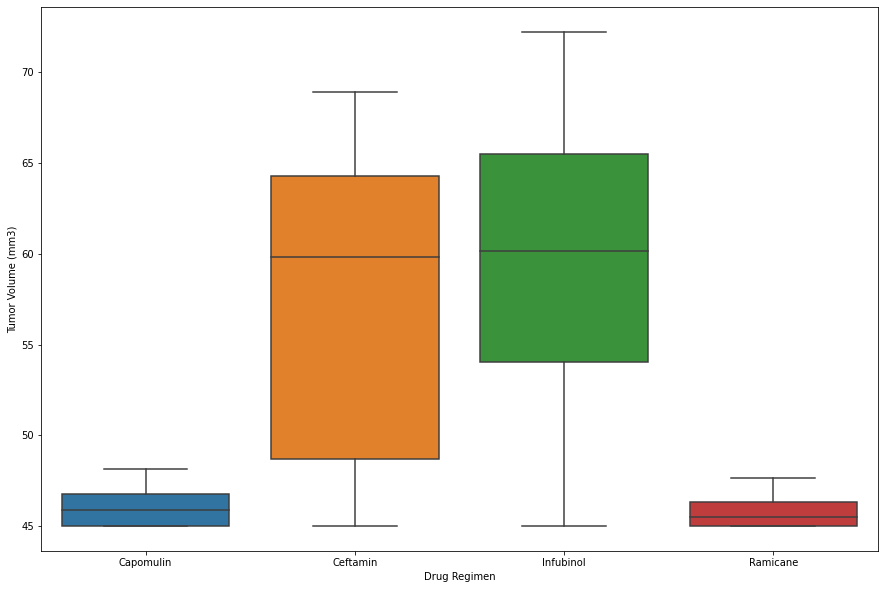

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#fig size
plt.figure(figsize=(15,10))
sns.boxplot(x=grouped_bymouse_ID["Drug Regimen"], y = grouped_bymouse_ID["Tumor Volume (mm3)"])


plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

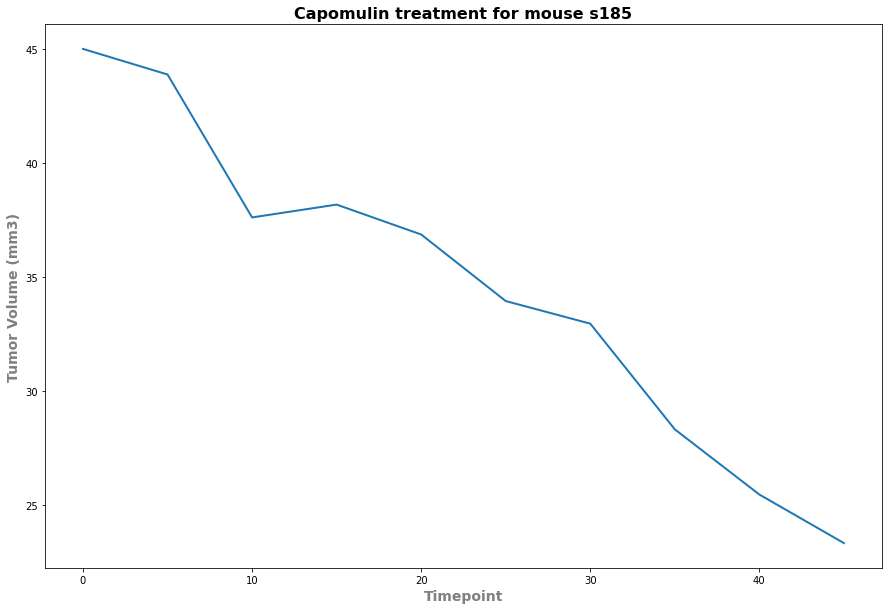

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_scatterdf= clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Capomulin")]

#plotting data for mouse with ID s185 (choosen)
s185_mouse = Capomulin_scatterdf.loc[(Capomulin_scatterdf["Mouse ID"] == "s185")]

y = s185_mouse["Tumor Volume (mm3)"]
x = s185_mouse["Timepoint"]

plt.figure(figsize=(15,10))
plt.plot(x,y, linewidth=2, markersize=12)

plt.title('Capomulin treatment for mouse s185',  fontsize = 16, fontweight = 'bold')
plt.xlabel('Timepoint', fontsize = 14, fontweight = 'bold', color = 'gray')
plt.ylabel('Tumor Volume (mm3)', fontsize = 14, rotation = 90, 
           fontweight = 'bold', color = 'gray' )

plt.show()



In [34]:
Capomulin_scatterdf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [35]:
#plotting data for mouse with ID S185
S185_mouse = Capomulin_scatterdf.loc[(Capomulin_scatterdf["Mouse ID"] == "S185")]

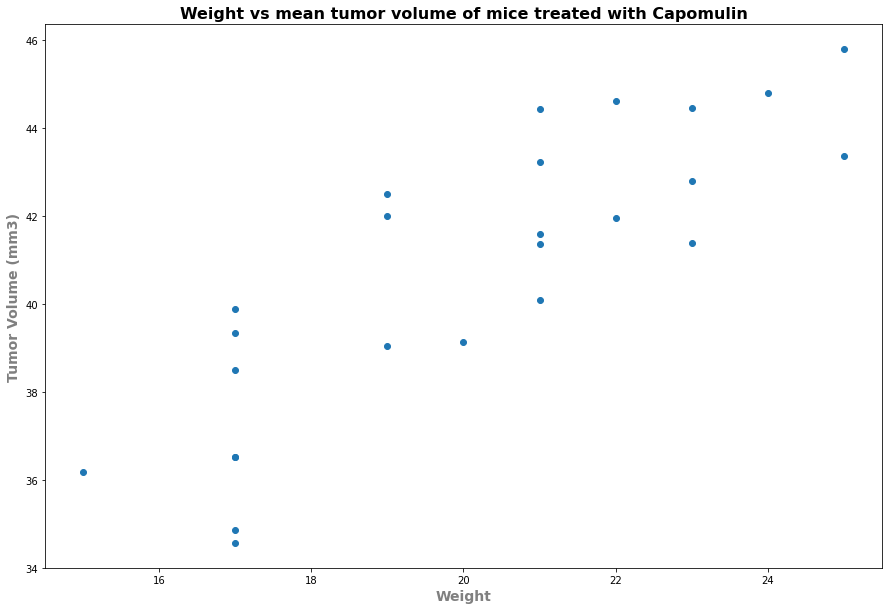

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_tumordf = Capomulin_scatterdf.groupby("Mouse ID").mean("Tumor Volume (mm3)")
average_tumordf.head()


y = average_tumordf["Tumor Volume (mm3)"]
x = average_tumordf["Weight (g)"]

plt.figure(figsize=(15,10))
plt.scatter(x,y)

plt.title('Weight vs mean tumor volume of mice treated with Capomulin',
         fontsize = 16, fontweight = 'bold')

plt.xlabel('Weight', fontsize = 14, fontweight = 'bold', color = 'gray')
plt.ylabel('Tumor Volume (mm3)', fontsize = 14, rotation = 90, 
           fontweight = 'bold', color = 'gray' )

plt.show()


## Correlation and Regression

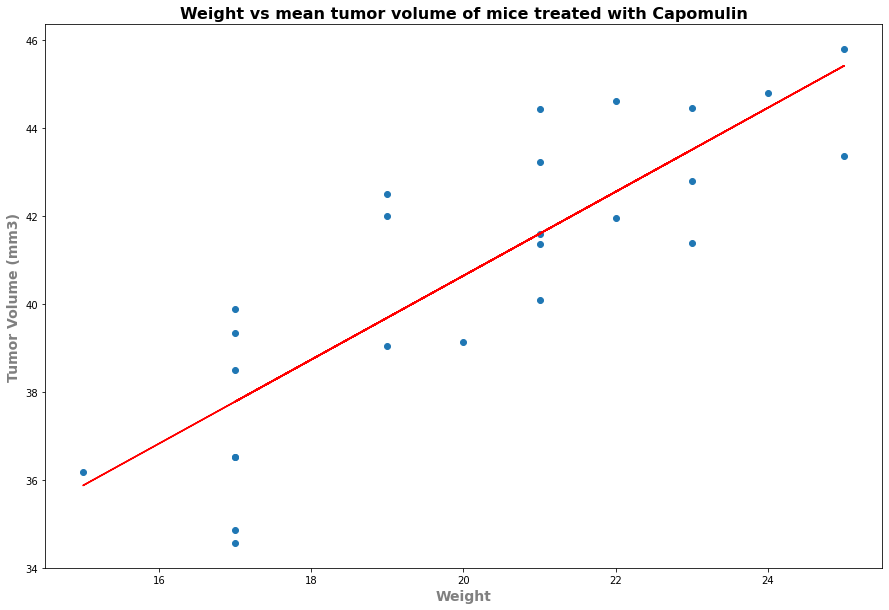

R squared: 0.7088568047708723


In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

average_tumordf = Capomulin_scatterdf.groupby("Mouse ID").mean("Tumor Volume (mm3)")
average_tumordf.head()


y = average_tumordf["Tumor Volume (mm3)"]
x = average_tumordf["Weight (g)"]

plt.figure(figsize=(15,10))
plt.scatter(x,y)

plt.title('Weight vs mean tumor volume of mice treated with Capomulin',fontsize = 16, 
          fontweight = 'bold')

plt.xlabel('Weight', fontsize = 14, fontweight = 'bold', color = 'gray')

plt.ylabel('Tumor Volume (mm3)', fontsize = 14, rotation = 90, 
           fontweight = 'bold', color = 'gray' )

## defining x and y values for the linear regression model

x_values = y = average_tumordf["Weight (g)"]
y_values = average_tumordf["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#label plot

#plt.legend(frameon = False, fontsize = 14)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# inserting colorbar


plt.show()

# Print r square value
print(f"R squared: {rvalue**2}")

## Conclusion

#Based on the regression plots the mouse weight gain increased linearly as the tumour volume increased

#Based on the boxplots it appears that the best drug treatment regimens are Capomuline and Ramicane